In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
# from sktime.forecasting.model_selection import temporal_train_test_split
from pmdarima import AutoARIMA
# from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('../air-traffic-prediction/Sample.csv')
df = df.dropna()
df['DATE'] = df['YEAR'].astype(str) + '-' + df['MONTH']
df['TOTAL DEPARTURES'] = df['TOTAL DEPARTURES'].str.replace(',', '').astype(float)
df['HOURS FLOWN'] = q = df['HOURS FLOWN'].str.replace(',', '').astype(float)
df['KILOMETRE FLOWN'] = df['KILOMETRE FLOWN'].str.replace(',', '').astype(float)
df['PASSENGERS CARRIED'] = df['PASSENGERS CARRIED'].str.replace(',', '').astype(float)
df['AVAILABLE SEAT KILOMETRE (IN THOUSAND)'] = df['AVAILABLE SEAT KILOMETRE (IN THOUSAND)'].str.replace(',', '').astype(float)
df[' FREIGHT CARRIED (IN TONNE)'] = df[' FREIGHT CARRIED (IN TONNE)'].str.replace(',', '').astype(float)
df['MAIL CARRIED (IN TONNE)'] = df['MAIL CARRIED (IN TONNE)'].str.replace(',', '').astype(float)
df.rename(columns={' FREIGHT CARRIED (IN TONNE)': 'FREIGHT CARRIED (IN TONNE)'}, inplace=True)


df['SEASONAL_DIFF'] = df['PASSENGERS CARRIED'].diff(12)
df['log_PASSENGERS_CARRIED'] = np.log(df['PASSENGERS CARRIED'])
# df['SEASONAL_DIFF'] = df['SEASONAL_DIFF'].diff(1)
# df['log_PASSENGERS_CARRIED'] = df['log_PASSENGERS_CARRIED'].diff(1)

df['sqrt_PASSENGERS_CARRIED'] = np.sqrt(df['PASSENGERS CARRIED'])
# df['sqrt_PASSENGERS_CARRIED'] = df['sqrt_PASSENGERS_CARRIED'].diff(1)

# df['']

df['cubert_PASSENGERS_CARRIED'] = np.cbrt(df['PASSENGERS CARRIED'])
# df['cubert_PASSENGERS_CARRIED'] = df['cubert_PASSENGERS_CARRIED'].diff(1)

In [3]:
# ARIMA model 
model = AutoARIMA(seasonal=True ,sp=12, trace=True)
# model = AutoARIMA(seasonal=True, m=12, trace=True, 
#                    order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# y = df['PASSENGERS CARRIED'].dropna()
# y = df['SEASONAL_DIFF'].dropna()
# y = df['log_PASSENGERS_CARRIED'].dropna()
# y = df['sqrt_PASSENGERS_CARRIED'].dropna()
y = df['cubert_PASSENGERS_CARRIED'].dropna()

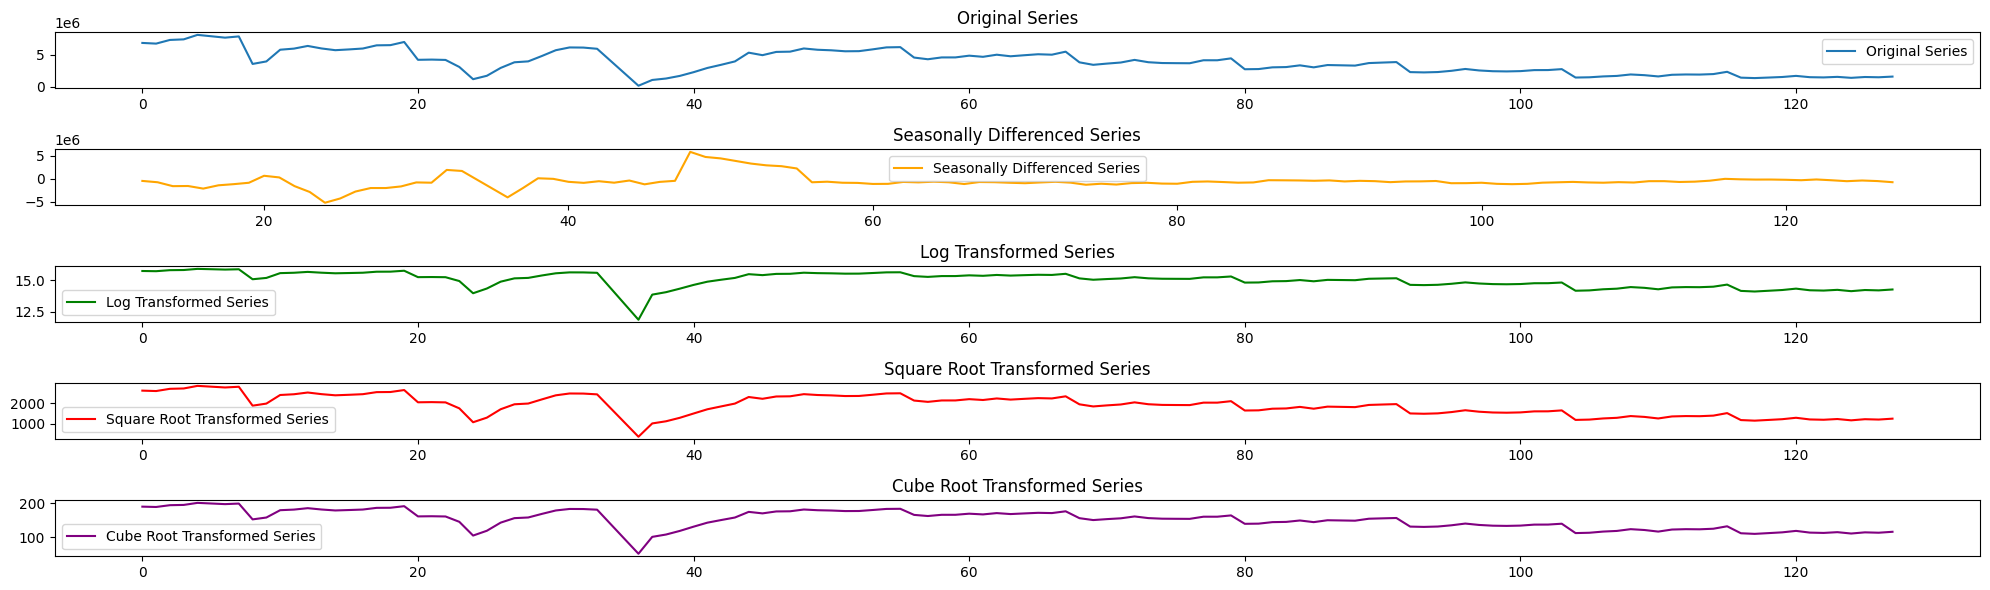

In [4]:
plt.figure(figsize=(20, 6))
plt.subplot(5, 1, 1)
plt.plot(df['PASSENGERS CARRIED'], label='Original Series')
plt.title('Original Series')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(df['SEASONAL_DIFF'], label='Seasonally Differenced Series', color='orange')
plt.title('Seasonally Differenced Series')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(df['log_PASSENGERS_CARRIED'], label='Log Transformed Series', color='green')
plt.title('Log Transformed Series')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(df['sqrt_PASSENGERS_CARRIED'], label='Square Root Transformed Series', color='red')
plt.title('Square Root Transformed Series')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df['cubert_PASSENGERS_CARRIED'], label='Cube Root Transformed Series', color='purple')
plt.title('Cube Root Transformed Series')
plt.legend()

plt.tight_layout()
plt.show()




In [5]:
model.fit(y)
forecast_steps = 12
y_pred_diff = model.predict(forecast_steps)

# y_pred = np.exp(y_pred_diff)
y_pred = y_pred_diff ** 3


# last_value = df['PASSENGERS CARRIED'].iloc[-1]
# y_pred = y_pred + last_value

forecast_index = pd.period_range(start='2023-09', periods=forecast_steps, freq='M')
forecast_dates = [date.strftime('%Y %b').upper() for date in forecast_index]

forecast_df = pd.DataFrame({
    'YEAR_MONTH': forecast_dates,
    'PASSENGERS CARRIED': y_pred
})

print("YEAR_MONTH,PASSENGERS CARRIED")
for _, row in forecast_df.iterrows():
    print(f"{row['YEAR_MONTH']},{row['PASSENGERS CARRIED']}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1045.807, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1044.328, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1043.508, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1043.984, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1043.452, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1039.783, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1038.712, Time=0.10 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1039.764, Time=0.16 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=1039.273, Time=0.06 s

/home/sabil/environments/dai/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sabil/environments/dai/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sabil/environments/dai/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['sp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
